In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 

In [2]:
data = pd.read_excel('Cleaned_results.xlsx')
data = pd.DataFrame(data)

print(data)

            date home_team away_team  year  home  away  goal_margin
0     1879-01-18       EU1       EU3  1879     1    -1            1
1     1880-03-15       EU3       EU1  1880    -1     1            1
2     1881-02-26       EU1       EU3  1881    -1     1            1
3     1882-03-13       EU3       EU1  1882     1    -1            2
4     1883-02-03       EU1       EU3  1883     1    -1            5
...          ...       ...       ...   ...   ...   ...          ...
8760  2021-07-20       NA2       AS1  2021    -1     1            2
8761  2021-07-24       NA1       NA2  2021     1    -1            3
8762  2021-07-24       AS1       NA2  2021     1    -1            1
8763  2021-07-25       NA1       NA1  2021    -1     1            2
8764  2021-07-29       NA1       NA1  2021     1    -1            1

[8765 rows x 7 columns]


In [3]:
#sample analysis on EU1
use_EU1 = []
for k in range (len(data)):
    if data['home_team'][k] == 'EU1' and data['away_team'][k] not in ['EU1', 'EU2', 'EU3']:
        use_EU1.append(k)
for g in range (len(data)):
    if data['away_team'][g] == 'EU1' and data['home_team'][g] not in ['EU1', 'EU2', 'EU3']:
        use_EU1.append(g)
data_eu1 = data.filter(items = use_EU1, axis = 0)
data_eu1 = data_eu1.replace(to_replace = r'^AS.$', value = 'Asia', regex = True)
data_eu1 = data_eu1.replace(to_replace = r'^SA.$', value = 'South_America', regex = True)
data_eu1 = data_eu1.replace(to_replace = r'^NA.$', value = 'North_America', regex = True)
data_eu1 = data_eu1.replace(to_replace = r'^AF.$', value = 'Africa', regex = True)
print(data_eu1)

            date      home_team      away_team  year  home  away  goal_margin
466   1928-04-01            EU1  South_America  1928     0     0            0
532   1930-07-13            EU1  North_America  1930     1    -1            3
538   1930-07-20            EU1  South_America  1930    -1     1            1
1129  1950-07-02            EU1  South_America  1950     1    -1            2
1154  1951-05-09            EU1  South_America  1951     1    -1            1
...          ...            ...            ...   ...   ...   ...          ...
8358  2018-06-18         Africa            EU1  2018    -1     1            1
8373  2018-06-25           Asia            EU1  2018     0     0            0
8383  2018-06-30  South_America            EU1  2018     1    -1            1
8388  2018-07-06  South_America            EU1  2018    -1     1            2
8389  2018-07-06  South_America            EU1  2018    -1     1            1

[424 rows x 7 columns]


In [4]:
eu = []
opponent = []
match_status = []
for x in range (len(data_eu1)):
    eu.append('EU1')
    if np.array(data_eu1['home_team'])[x] == 'EU1':
        opponent.append(np.array(data_eu1['away_team'])[x])
        match_status.append(np.array(data_eu1['home'])[x])
    else:
        opponent.append(np.array(data_eu1['home_team'])[x])
        match_status.append(np.array(data_eu1['away'])[x])
        
eu1 = pd.DataFrame(data = {'europe_tier1' : eu, 'opponent' : opponent, 'match_status' : match_status, 'goal_margin' : np.array(data_eu1['goal_margin']), 'year' : np.array(data_eu1['year'])})

print(eu1)

    europe_tier1       opponent  match_status  goal_margin  year
0            EU1  South_America             0            0  1928
1            EU1  North_America             1            3  1930
2            EU1  South_America            -1            1  1930
3            EU1  South_America             1            2  1950
4            EU1  South_America             1            1  1951
..           ...            ...           ...          ...   ...
419          EU1         Africa             1            1  2018
420          EU1           Asia             0            0  2018
421          EU1  South_America            -1            1  2018
422          EU1  South_America             1            2  2018
423          EU1  South_America             1            1  2018

[424 rows x 5 columns]


In [5]:
#making sub-data-frame wrt opponent's region
eu1_asia = []
eu1_north_america =[]
eu1_south_america =[]
eu1_africa = []

for y in range (len(eu1)):
    if opponent[y] == 'Asia':
        eu1_asia.append(y)
    elif opponent[y] == 'North_America':
        eu1_north_america.append(y)
    elif opponent[y] == 'South_America':
        eu1_south_america.append(y)
    if opponent[y] == 'Africa':
        eu1_africa.append(y)
#verifying
print(len(eu1_africa) + len(eu1_asia) + len(eu1_south_america) + len(eu1_north_america) )

424


In [6]:
#eu1_vs_asia 
eu1_vs_asia = eu1.filter(items = eu1_asia, axis = 0)

#eu1_vs_north_america 
eu1_vs_north_america = eu1.filter(items = eu1_north_america, axis = 0)

#eu1_vs_south_america 
eu1_vs_south_america = eu1.filter(items = eu1_south_america, axis = 0)

#eu1_vs_africa 
eu1_vs_africa = eu1.filter(items = eu1_africa, axis = 0)

eu1_vs_asia.to_excel("Eu_Tier1_vs_Asia.xlsx", index = False)
eu1_vs_north_america.to_excel("Eu_Tier1_vs_North_America.xlsx", index = False)
eu1_vs_south_america.to_excel("Eu_Tier1_vs_South_America.xlsx", index = False)
eu1_vs_africa.to_excel("Eu_Tier1_vs_Africa.xlsx", index = False)

    europe_tier1 opponent  match_status  goal_margin  year
50           EU1     Asia             1            1  1978
96           EU1     Asia            -1            1  1994
99           EU1     Asia             1            1  1995
111          EU1     Asia             0            0  1998
117          EU1     Asia             1            4  1998
127          EU1     Asia             0            0  2000
130          EU1     Asia             1            5  2001
147          EU1     Asia            -1            2  2003
152          EU1     Asia             1            1  2003
155          EU1     Asia             0            0  2004
162          EU1     Asia             1            1  2006
167          EU1     Asia             1            2  2006
170          EU1     Asia             1            1  2006
186          EU1     Asia             1            2  2009
205          EU1     Asia            -1            1  2012
210          EU1     Asia             1            1  20

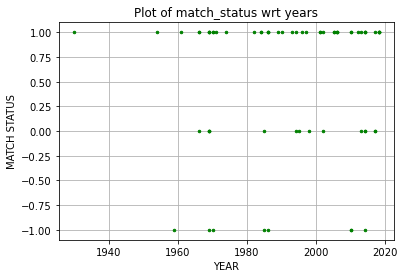

Text(0.5, 1.0, 'Histogram of match_status')

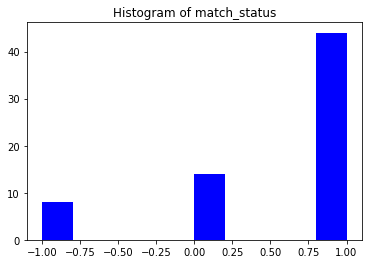

In [7]:
#checking
print(eu1_vs_asia)

#plot eu1_vs_north_america
plt.plot(eu1_vs_north_america['year'], eu1_vs_north_america['match_status'], 'o-', ms = 2.5, color = 'green', linestyle = '')
plt.xlabel('YEAR')
plt.ylabel('MATCH STATUS')
plt.title('Plot of match_status wrt years')
plt.grid(True)
plt.show()

plt.hist(eu1_vs_north_america['match_status'], color = 'blue')
plt.title('Histogram of match_status')